## Dataset and Problem Introduction

In this analysis, we explore the gender gap by looking at the percentage of bachelor's degrees granted to women from 1970 to 2010 in the US.

Data Source: https://nces.ed.gov/programs/digest/2013menu_tables.asp
<br>Reference: https://dataquest.io/

In [1]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt


# to show the plots within the notebook
%matplotlib inline   

# Reading the data set

women_degrees = pd.read_csv("datasets\percent-bachelors-degrees-women-usa.csv")
print(women_degrees.columns)
women_degrees.head(5)

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')


,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## Categorising the Majors

There are 17 majors listed in the dataset:

'Agriculture', 'Architecture', 'Art and Performance', 'Biology', 'Business', 'Communications and Journalism', 'Computer Science', 'Education', 'Engineering', 'English', 'Foreign Languages', 'Health Professions', 'Math and Statistics', 'Physical Sciences', 'Psychology', 'Public Administration', 'Social Sciences and History'

These majors can be divided into 3 groups. 

* STEM (Science, Technology, Engineering, and Mathematics)
* Liberal Arts
* Other categories

| Major    | Category |
| ----------- | ----------- |
| Psychology    | STEM     |
| Biology  | STEM      |
| Math and Statistics  | STEM      |
| Physical Sciences | STEM      |
| Computer Science  | STEM      |
| Engineering  | STEM      |
| Foreign Languages  | Liberal Arts     |
| English | Liberal Arts     |
| Communications and Journalism | Liberal Arts     |
| Art and Performance  | Liberal Arts     |
| Social Sciences and History  | Liberal Arts     |
| Health Profession  | Others    |
| Public Administration | Others    |
| Education | Others    |
| Agriculture  | Others    |
| Business  | Others    |
| Architecture | Others    |

In [2]:
# Creating STEM Category list

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']

# Creating Liberal Category list

lib_arts_cats = [
    'Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 
    'Social Sciences and History']

# Creating Other Category list

other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

## Major vs Gender Plots

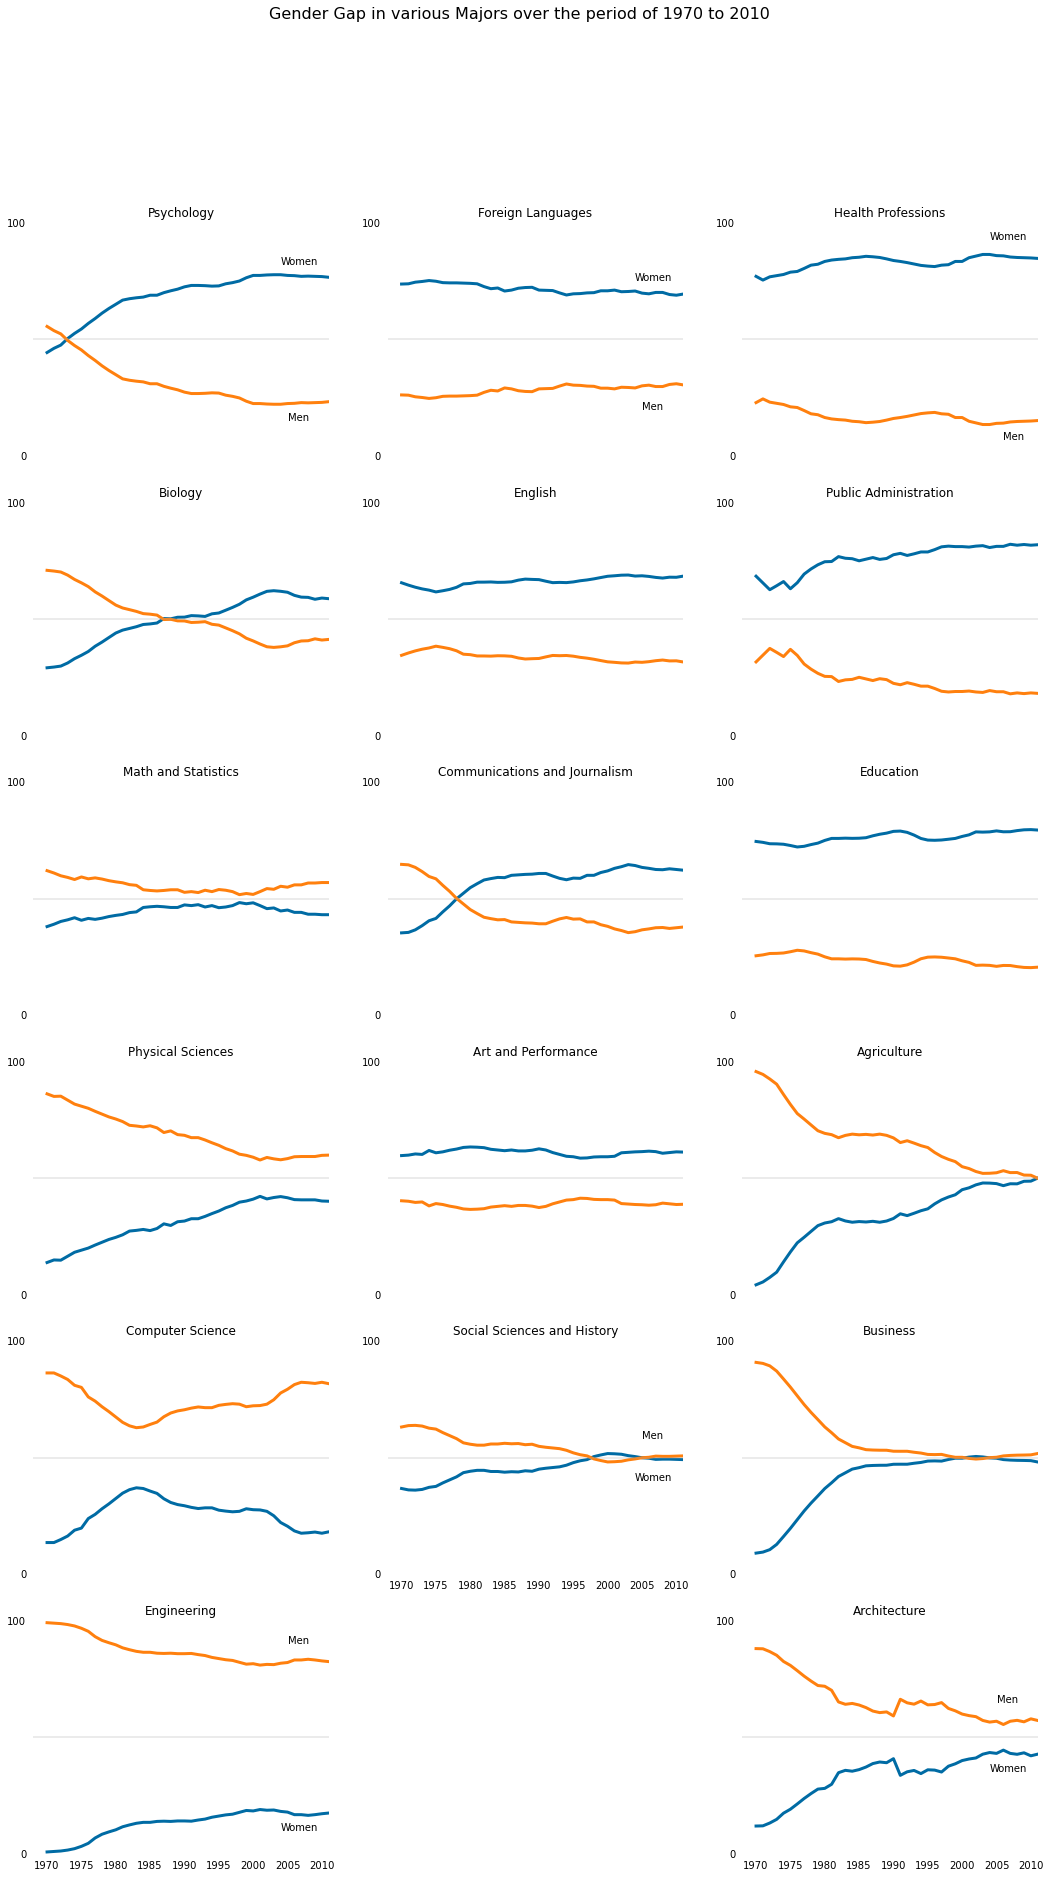

In [3]:
# Choosing the colours

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# Creating the plotting area

fig = plt.figure(figsize=(18, 30))
fig.suptitle('Gender Gap in various Majors over the period of 1970 to 2010', fontsize=16)

##### Creating the plot for STEM group ##########

for i in range(0,6):                                       # For loop to go through each 6 subplots
    
    ax = fig.add_subplot( 6, 3, ( i*3 + 1 ))                 # Finds 1st column in each row
    
    x = women_degrees['Year']                                  # x value is the Year 
    y = women_degrees[stem_cats[i]]                             # y value is the major
    y_men = 100 -y                                                # y men is found by subtracting women % from 100
    
    ax.plot(x, y , c=cb_dark_blue, label='Women', linewidth=3)      # Plotting the data of women
    ax.plot(x, y_men, c=cb_orange, label='Men', linewidth=3)         # Plotting the data of men
    
    ax.set_title(stem_cats[i])                                        #Giving the plot its title 
    
   #### Improving the Plot Aesthetics #####

    ax.set_xlim(1968, 2011)                                      # Setting the x limit
    ax.set_ylim(0,100)                                          # Setting the y limit

    for spine in ax.spines.values():                          # Removing all 4 spines of a plot
        spine.set_visible(False)
       
    ax.set_yticks([0,100])                                 # Setting the y ticks to 0 and 100
    
    ax.axhline(50, c=(
        171/255, 171/255, 171/255), alpha=0.3)           # Creating a 50% line to give visual clue
    
    # Removing all the other ticks from the plot
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom =False)
    
    # Setting the labels for easy understanding
    
    if i == 0:                                      # Condition to set the label only on the top plot
        ax.text(2005, 15, 'Men')
        ax.text(2004, 82, 'Women')
    elif i == 5:                                 # condition to set the label only on the bottom plot
        ax.text(2005, 90, 'Men')
        ax.text(2004, 10, 'Women')
        ax.tick_params(labelbottom=True)    # Enabling x ticks only on the bottom plot
    
##### Creating the plot for Liberal arts group  #############

for i in range(0,5):                                       # For loop to go through each 5 subplots
    
    ax = fig.add_subplot( 6, 3, ( i*3 + 2 ))                 # Finds 1st column in each row
    
    x = women_degrees['Year']                                  # x value is the Year 
    y = women_degrees[lib_arts_cats[i]]                          # y value is the major
    y_men = 100 -y                                                # y men is found by subtracting women % from 100
    
    ax.plot(x, y , c=cb_dark_blue, label='Women', linewidth=3)      # Plotting the data of women
    ax.plot(x, y_men, c=cb_orange, label='Men', linewidth=3)         # Plotting the data of men
    
    ax.set_title(lib_arts_cats[i])                                      # Giving the plot its title
    
   #### Improving the Plot Aesthetics #####

    ax.set_xlim(1968, 2011)                                      # Setting the x limit
    ax.set_ylim(0,100)                                          # Setting the y limit

    for spine in ax.spines.values():                          # Removing all 4 spines of a plot
        spine.set_visible(False)
       
    ax.set_yticks([0,100])                                 # Setting the y ticks to 0 and 100
    
    ax.axhline(50, c=(
        171/255, 171/255, 171/255), alpha=0.3)           # Creating a 50% line to give visual clue
    
    # Removing all the other ticks from the plot
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom =False)
    
    # Setting the labels for easy understanding
    
    if i == 0:                                      # Condition to set the label only on the top plot
        ax.text(2005, 20, 'Men')
        ax.text(2004, 75, 'Women')
    elif i == 4:                                 # condition to set the label only on the bottom plot
        ax.text(2005, 58, 'Men')
        ax.text(2004, 40, 'Women')
        ax.tick_params(labelbottom=True)    # Enabling x ticks only on the bottom plot        
        
##### Creating the plot for Other group  ############

for i in range(0,6):                                       # For loop to go through each 6 subplots
    
    ax = fig.add_subplot( 6, 3, ( i*3 + 3 ))                 # Finds 1st column in each row
    
    x = women_degrees['Year']                                  # x value is the Year 
    y = women_degrees[other_cats[i]]                            # y value is the major
    y_men = 100 -y                                                # y men is found by subtracting women % from 100
    
    ax.plot(x, y , c=cb_dark_blue, label='Women', linewidth=3)      # Plotting the data of women
    ax.plot(x, y_men, c=cb_orange, label='Men', linewidth=3)         # Plotting the data of men
    
    ax.set_title(other_cats[i])                                        #Giving the plot its title
    
   #### Improving the Plot Aesthetics #####

    ax.set_xlim(1968, 2011)                                      # Setting the x limit
    ax.set_ylim(0,100)                                          # Setting the y limit

    for spine in ax.spines.values():                          # Removing all 4 spines of a plot
        spine.set_visible(False)
       
    ax.set_yticks([0,100])                                 # Setting the y ticks to 0 and 100
    
    ax.axhline(50, c=(
        171/255, 171/255, 171/255), alpha=0.3)           # Creating a 50% line to give visual clue
    
    # Removing all the other ticks from the plot
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom =False)
    
    # Setting the labels for easy understanding
    
    if i == 0:                                      # Condition to set the label only on the top plot
        ax.text(2006, 7, 'Men')
        ax.text(2004, 93, 'Women')
    elif i == 5:                                 # condition to set the label only on the bottom plot
        ax.text(2005, 65, 'Men')
        ax.text(2004, 35, 'Women')
        ax.tick_params(labelbottom=True)    # Enabling x ticks only on the bottom plot
    
###### Plot Printing ####### 

plt.savefig("gender_degrees.png")    # To Save the plot as .png image    
plt.show()                          # To show the plot

# Conclusion

* Things have drastically changed from 1970 to 2010. In 1970, in 11 out of 17 majors, women percentage is below the 50% line, but by 2010 that number has changed to 8 out of 17. But in 3 out of these 8 majors, women are behind men by a very small fraction. That translates to, in 12 out of 18 majors, women are either ahead of men or in close competition. 

* We can see that in almost all majors, over the years women are improving their presence. Though in most of the STEM majors, women still need to catch up. 

This dataset shows us a cross sectional picture of the gender gap from 1970-2010 in US education. Since education defines how a society will function as a whole, we can try to interpolate these observation to the whole society. If that is the case, we can say that the gender gap is not myth, it really exists. 